# Forecast

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import m5.config as cfg
from m5.model import train, predict
from m5.evaluate import accuracy
from m5.plot import plot_fcst

# Library settings
pd.options.display.max_columns = 999
plt.rcParams["figure.figsize"] = (14, 4)

## Parameters

In [3]:
level = 1

In [4]:
# Parameters
level = 3


## Train

In [5]:
params = {
    "task": "train",
    "objective": "tweedie",
    "num_iterations": 1000,
    "learning_rate": 0.1,
    "num_leaves": 31,
    "num_threads": 4,
    "early_stopping_round": 100,
}

In [6]:
train(cfg.DATA_DIR, cfg.MODEL_DIR, level, params)

Training model...
[LightGBM] [Info] Load from binary file /home/ariel/Playground/m5-forecasting/data/processed/datasets/3/train.bin
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5489
[LightGBM] [Info] Number of data points in the train set: 18440, number of used features: 26
[LightGBM] [Info] Start training from score 8.143433
[1]	valid_0's tweedie: 260.767
Training until validation scores don't improve for 100 rounds
[2]	valid_0's tweedie: 260.196
[3]	valid_0's tweedie: 259.729
[4]	valid_0's tweedie: 259.362
[5]	valid_0's tweedie: 259.065
[6]	valid_0's tweedie: 258.818
[7]	valid_0's tweedie: 258.617
[8]	valid_0's tweedie: 258.446
[9]	valid_0's tweedie: 258.312
[10]	valid_0's tweedie: 258.194
[11]	valid_0's tweedie: 258.1
[12]	valid_0's tweedie: 258.02
[13]	valid_0's tweedie: 257.944
[14]	valid_0's tweedie: 257.879
[15]	valid_0's tweedie: 2

/home/ariel/anaconda3/envs/merlion/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/home/ariel/anaconda3/envs/merlion/lib/python3.9/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[78]	valid_0's tweedie: 257.566
[79]	valid_0's tweedie: 257.565
[80]	valid_0's tweedie: 257.564
[81]	valid_0's tweedie: 257.562
[82]	valid_0's tweedie: 257.562
[83]	valid_0's tweedie: 257.562
[84]	valid_0's tweedie: 257.564
[85]	valid_0's tweedie: 257.563
[86]	valid_0's tweedie: 257.562
[87]	valid_0's tweedie: 257.562
[88]	valid_0's tweedie: 257.563
[89]	valid_0's tweedie: 257.563
[90]	valid_0's tweedie: 257.563
[91]	valid_0's tweedie: 257.562
[92]	valid_0's tweedie: 257.563
[93]	valid_0's tweedie: 257.564
[94]	valid_0's tweedie: 257.562
[95]	valid_0's tweedie: 257.562
[96]	valid_0's tweedie: 257.561
[97]	valid_0's tweedie: 257.561
[98]	valid_0's tweedie: 257.562
[99]	valid_0's tweedie: 257.562
[100]	valid_0's tweedie: 257.562
[101]	valid_0's tweedie: 257.562
[102]	valid_0's tweedie: 257.562
[103]	valid_0's tweedie: 257.562
[104]	valid_0's tweedie: 257.562
[105]	valid_0's tweedie: 257.563
[106]	valid_0's tweedie: 257.564
[107]	valid_0's tweedie: 257.563
[108]	valid_0's tweedie: 257.563

## Predict

In [7]:
fcst = predict(cfg.DATA_DIR, cfg.MODEL_DIR, cfg.FCST_DIR, level)
fcst

,store_id,d,sales,fcst
18850,0,1886,3905,3773.557657
18860,0,1887,3788,3604.814953
18870,0,1888,3339,3495.176921
18880,0,1889,4076,3541.036203
18890,0,1890,4983,4062.146883
...,...,...,...,...
19089,9,1909,3159,2818.756455
19099,9,1910,3226,3004.930271
19109,9,1911,3828,3689.981985
19119,9,1912,4686,4342.504595


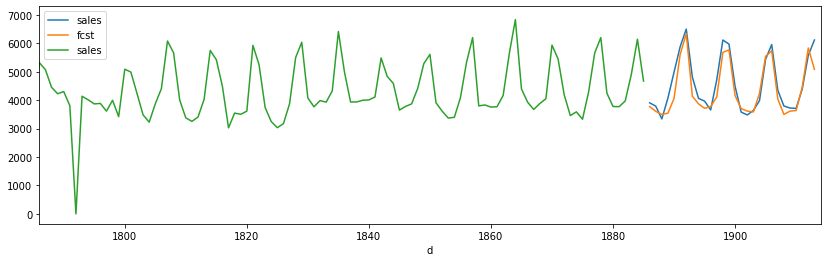

In [8]:
plot_fcst(cfg.DATA_DIR, cfg.FCST_DIR, level=level)

## Evaluate

In [9]:
accuracy_df = accuracy(cfg.DATA_DIR, cfg.FCST_DIR, cfg.METRICS_DIR, level)
accuracy_df

,store_id,mse_fcst,mse_naive_insample,weights,msse,rmsse,wrmsse
0,0,145570.972110,750171.495754,0.109100,0.194050,0.440511,0.048060
1,1,513801.047260,563669.303609,0.102343,0.911529,0.954740,0.097711
2,2,157770.338897,921369.304140,0.157984,0.171235,0.413805,0.065375
3,3,28924.506606,100483.197452,0.064323,0.287854,0.536520,0.034511
4,4,51993.024137,356746.298832,0.079185,0.145742,0.381762,0.030230
5,5,61684.131882,583479.563163,0.101254,0.105718,0.325143,0.032922
6,6,64259.357614,327078.698514,0.098930,0.196465,0.443243,0.043850
7,7,128164.565052,509842.136943,0.085972,0.251381,0.501379,0.043105
8,8,372617.998400,512924.965499,0.117008,0.726457,0.852325,0.099729
9,9,75647.815011,506963.504777,0.083900,0.149217,0.386287,0.032410


In [10]:
accuracy_df["weights"].sum()

1.0

In [11]:
accuracy_df["wrmsse"].sum()

0.5279012259419275

## Misc